In [2]:
import numpy as np
import scipy.io
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# Create Training & Testing Datasets

# load `.mat` file
data = scipy.io.loadmat('face.mat')

# N: number of images
# D: number of pixels
X = data['X']  # shape: [D x N]
y = data['l']  # shape: [1 x N]

# Number of images
D, N = X.shape

# Fix the random seed
np.random.seed(13)

# Cardinality of labels
_card = len(set(y.ravel()))

# Step splitting of dataset
_step = int(N / _card)

# Shape boundaries
_bounds = np.arange(0, N+1, _step)

# Shapes
shapes = list(zip(_bounds[:-1], _bounds[1:]))

# Training Mask
_mask = []

for _shape in shapes:
    _idx = np.random.choice(
        np.arange(*_shape), int(0.8 * _step), replace=False)
    _mask.append(_idx)

mask_train = np.array(_mask).ravel()

mask_test = np.array(list(set(np.arange(0, N)) - set(mask_train)))

# Partition dataset to train and test sets
X_train, X_test = X[:, mask_train], X[:, mask_test]
y_train, y_test = y[:, mask_train], y[:, mask_test]

Text(0.5,1,'Mean Face\n')

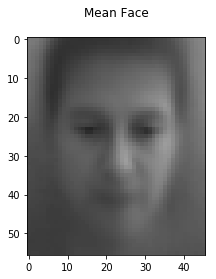

In [4]:
# Redefine D,N for X_train
D, N = X_train.shape

# mean face
mean_face = X_train.mean(axis=1).reshape(-1, 1)

# Plot mean face 
plt.imshow(mean_face.reshape(46,56).T,
           cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
plt.title('Mean Face\n')

Execution Time:  14.888625383377075


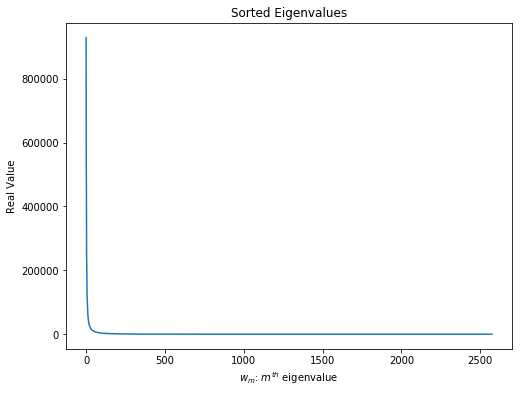

In [5]:
import time
start = time.time()


# Naive PCA
A = X_train - mean_face
S = (1 / N) * np.dot(A, A.T)

# Calculate eigenvalues `w` and eigenvectors `v`
_w, _u = np.linalg.eig(S)


# Indexes of eigenvalues, sorted by value
_indexes = np.argsort(np.abs(_w))[::-1]


# Sorted eigenvalues and eigenvectors
w = _w[_indexes]

u = np.real(_u[:, _indexes])

# Plot descending magnitude of eigenvalue agaisnt respective index of eigenvalue
plt.figure(figsize=(8.0, 6.0))
plt.plot(range(len(w)), np.abs(w))
plt.title('Sorted Eigenvalues')
plt.xlabel('$w_{m}$: $m^{th}$ eigenvalue')
plt.ylabel('Real Value')
end = time.time()
print("Execution Time: ", end - start)

In [6]:
sum(i > 0.0000001 for i in w)

415

Execution Time:  0.12637925148010254


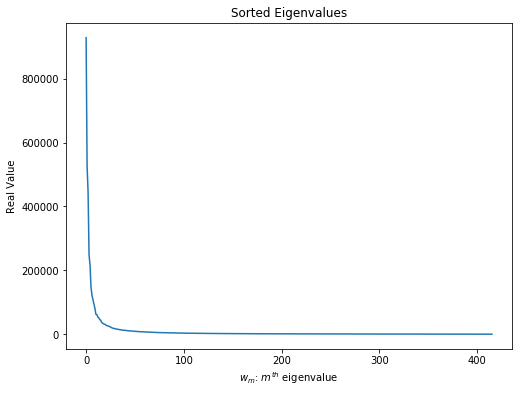

In [7]:
start = time.time()

# Effecient PCA
Se = (1 / N) * np.dot(A.T, A)

# Calculate eigenvalues `w` and eigenvectors `v`
_we, _ue = np.linalg.eig(Se)

# Indexes of eigenvalues, sorted by value
_indexese = np.argsort(np.abs(_we))[::-1]

# Sorted eigenvalues and eigenvectors
we = _we[_indexese]

ue = np.real(_ue[:, _indexese])

# Plot descending magnitude of eigenvalue agaisnt respective index of eigenvalue
plt.figure(figsize=(8.0, 6.0))
plt.plot(range(len(we)), np.abs(we))
plt.title('Sorted Eigenvalues')
plt.xlabel('$w_{m}$: $m^{th}$ eigenvalue')
plt.ylabel('Real Value')

end = time.time()
print("Execution Time: ", end - start)

In [8]:
sum(i > 0 for i in we)

416

In [9]:
sum(w == we)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


TypeError: 'bool' object is not iterable

Text(0,0.5,'Cumulative Explained Variance')

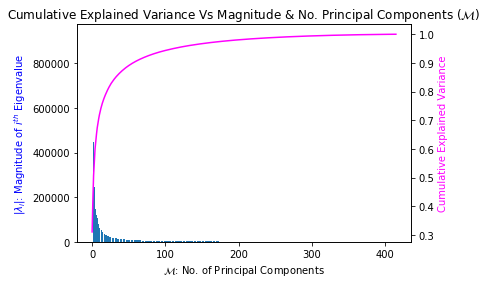

In [15]:
#Explained variance
from sklearn.decomposition import PCA as sklearnPCA
pca = sklearnPCA().fit(X_train)

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(range(len(we)), np.abs(we))
ax2.plot(range(len(we)), np.cumsum(pca.explained_variance_ratio_), 'magenta')
plt.title('Cumulative Explained Variance Vs Magnitude & No. Principal Components ($\mathcal{M}$)')
ax1.set_xlabel('$\mathcal{M}$: No. of Principal Components')
ax1.set_ylabel('$|\lambda_i|$: Magnitude of $i^{th}$ Eigenvalue', color='b')
ax2.set_ylabel('Cumulative Explained Variance', color= 'magenta')


In [10]:
np.array([pca.explained_variance_ratio_[:i].sum() for i in range(1, 122)]).round(2)

array([0.31, 0.42, 0.51, 0.56, 0.6 , 0.63, 0.65, 0.67, 0.69, 0.71, 0.72,
       0.73, 0.74, 0.75, 0.76, 0.77, 0.77, 0.78, 0.79, 0.79, 0.8 , 0.81,
       0.81, 0.82, 0.82, 0.82, 0.83, 0.83, 0.84, 0.84, 0.84, 0.85, 0.85,
       0.85, 0.86, 0.86, 0.86, 0.86, 0.87, 0.87, 0.87, 0.87, 0.88, 0.88,
       0.88, 0.88, 0.88, 0.89, 0.89, 0.89, 0.89, 0.89, 0.89, 0.9 , 0.9 ,
       0.9 , 0.9 , 0.9 , 0.9 , 0.9 , 0.91, 0.91, 0.91, 0.91, 0.91, 0.91,
       0.91, 0.91, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92, 0.92,
       0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93, 0.93,
       0.93, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94,
       0.94, 0.94, 0.94, 0.94, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95,
       0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95])

In [11]:
i = 0
while sum(we[:i]) <= (0.95* sum(we)):
    i += 1
len(we[:i])

123

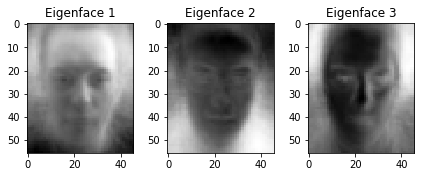

In [12]:
n_images = 3
fig, axes = plt.subplots(nrows=1, ncols=n_images)
for ax, img, i in zip(axes.flatten(), u[:, :n_images].T, range(1, n_images + 1)):
        ax.imshow(img.reshape(46,56).T,
                  cmap=plt.cm.Greys)
        ax.set_title('Eigenface %d' % i)
fig.tight_layout()